## INTRODUCTION
This notebook conducts a statistical analysis of a dataset using the R programming language.

The dataset utilized for this analysis is sourced from Kaggle, and you can access it [here](https://www.kaggle.com/datasets/pratikgarai/mobile-phone-specifications-and-prices/data).

During this analysis, we performed exploratory data analysis (EDAs), identified outliers using both Chebyshev’s rule and Box plot, and explored various probability distributions. Additionally, we conducted several hypothesis tests.

In [2]:
# Downloading the R language on Collab
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

In [3]:
# Reading the dataset
%%R
data=read.csv('/content/ndtv_data_final.csv')
# Getting the first six rows of the dataset
head(data)

  X                           Name   Brand                  Model
1 0 OnePlus 7T Pro McLaren Edition OnePlus 7T Pro McLaren Edition
2 1                  Realme X2 Pro  Realme                 X2 Pro
3 2              iPhone 11 Pro Max   Apple      iPhone 11 Pro Max
4 3                      iPhone 11   Apple              iPhone 11
5 4                   LG G8X ThinQ      LG              G8X ThinQ
6 5                     OnePlus 7T OnePlus                     7T
  Battery.capacity..mAh. Screen.size..inches. Touchscreen Resolution.x
1                   4085                 6.67         Yes         1440
2                   4000                 6.50         Yes         1080
3                   3969                 6.50         Yes         1242
4                   3110                 6.10         Yes          828
5                   4000                 6.40         Yes         1080
6                   3800                 6.55         Yes         1080
  Resolution.y Processor RAM..MB. Interna

In [4]:
# Getting the overall summary of the dataset
%%R
summary(data)

       X              Name              Brand              Model          
 Min.   :   0.0   Length:1359        Length:1359        Length:1359       
 1st Qu.: 339.5   Class :character   Class :character   Class :character  
 Median : 679.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 679.0                                                           
 3rd Qu.:1018.5                                                           
 Max.   :1358.0                                                           
 Battery.capacity..mAh. Screen.size..inches. Touchscreen       
 Min.   :1010           Min.   :2.400        Length:1359       
 1st Qu.:2300           1st Qu.:5.000        Class :character  
 Median :3000           Median :5.200        Mode  :character  
 Mean   :2938           Mean   :5.291                          
 3rd Qu.:3500           3rd Qu.:5.700                          
 Max.   :6000           Max.   :7.300                          
  Resolution.x     Resoluti

#### Observation
Paying attention to just the price column, we can easily see that the average cost for phones in the dataset is 11,466 rupees. Also, it is almost certain that there are outliers in the price column given the range of the prices.

## Question 1

### A: Describe the dataset using appropriate plots/curves/chart.

Here, we will look at the distribution of certain columns and answering the following question to get a better description of our dataset.
* What is the distribution of prices in the dataset
* What is the distribution of RAM in the dataset
* What is the distribution of Battery Capacity in the dataset
* What is the distribution of the number of sims in the dataset

**1. Distribution of Price**

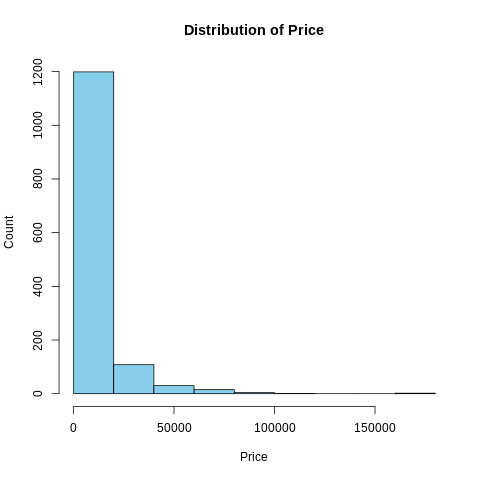

In [ ]:
# Distribution of Price
%%R
hist(data$Price, main = "Distribution of Price",  xlab = "Price", ylab = "Count",col = "skyblue")

#### Observation:
From this, we can see that most devices cost below 50,000 INR, and the most expensive phones cost about 150,000 INR.\


**2. Distribution of RAM**

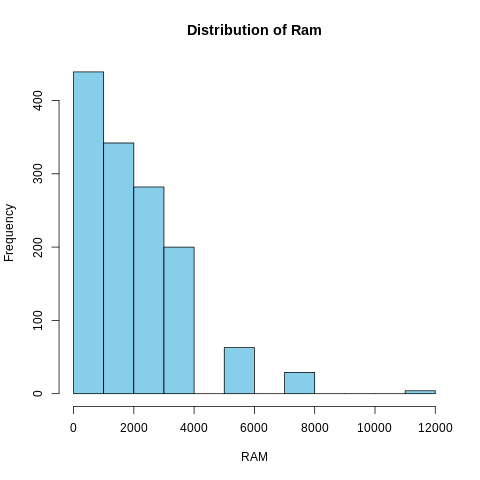

In [ ]:
# Distribution of Ram
%%R
hist(data$RAM, main = "Distribution of Ram", xlab = "RAM",col = "skyblue")

#### Observation
From the graph, we can see that most Phones in the dataset have below 4000 and 2000 RAM, and very few phones have 12000 RAM.

**3. Distribution of Price**

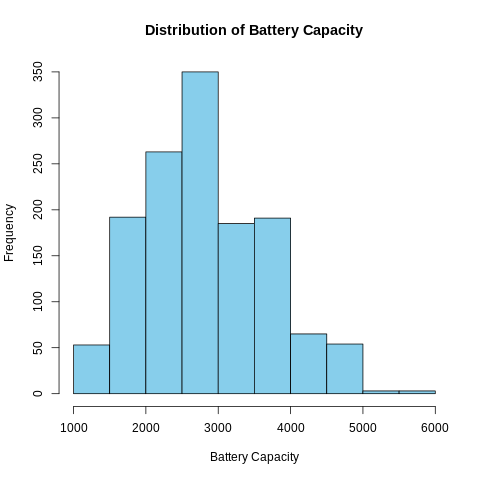

In [ ]:
# Distribution of Battery Capacity
%%R
hist(data$Battery.capacity..mAh., main = "Distribution of Battery Capacity",xlab = "Battery Capacity", col = "skyblue")

#### Observation:
The distribution of Batter capacity has somewhat of a near normal distribution. Majority of the phones have within 2000 an 40000 mAh capacity.

**4. Number of sims distribution**

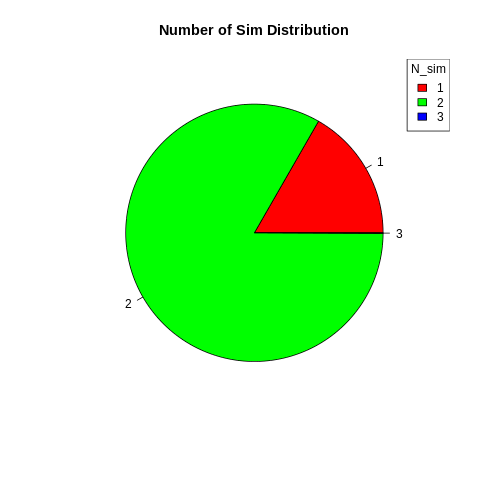

In [ ]:
# Number of sims distribution
%%R
N_sim = table(data$Number.of.SIMs)
N_sim_percent = round(N_sim / sum(N_sim) * 100,2)
# Plotting a pie chart to give a visual representation
pie(N_sim_percent, main = "Number of Sim Distribution", col = rainbow(length(N_sim_percent)))
legend("topright", legend = names(N_sim) , fill = rainbow(length(N_sim)), title = "N_sim")

#### Observations:
We can see, that a good percentage of the Phones have 2 sim ports, very few phones have 3 sims.

**5. Most Common Operating System**

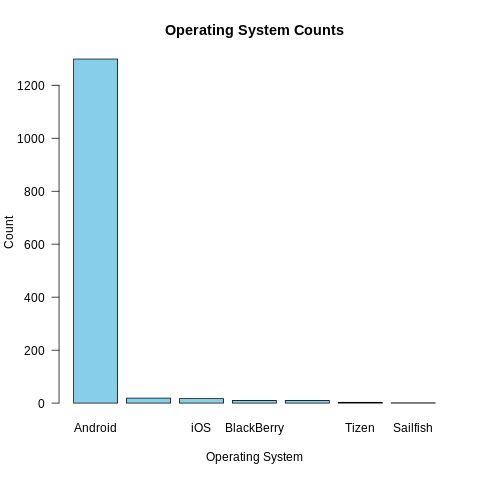

In [ ]:
%%R
OS = data$Operating.system
OS_count = table(OS)
OS_count_sorted = sort(OS_count, decreasing = TRUE)


# Visualizing on a bar plot
barplot(OS_count_sorted, main = "Operating System Counts", xlab = "Operating System", ylab = "Count", col = "skyblue", las = 1)



#### Observation:
From the bar chart, we can see that the most common OS in the data set is the andriod OS.


**6 The Most Expensive Phones**

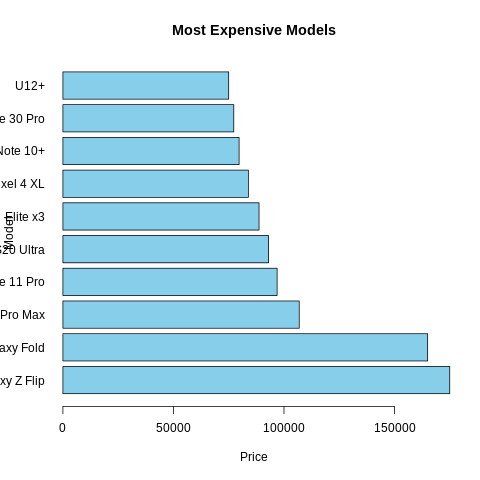

In [ ]:
# Top Most Expensive phones
%%R
Models= data[order(data$Price, decreasing = TRUE),]
Top_models = Models[,c('Model','Price')]
Top_10_models= Top_models[1:10,]
Top_10_models

# Plot the bar chart
barplot(height = Top_10_models$Price, names.arg = Top_10_models$Model, main = "Most Expensive Models", xlab = "Price", ylab = "Model", horiz = TRUE, las = 1, col = "skyblue")




#### Observations
The samsung galaxy z flip and smasung galaxy fold are the most expensive phones in the dataset, costing over 150,000 INR.

### B. Compute the central and variational measures of an attribute in the dataset

For this section, we will be using the Price column.

The Cental Measures here are:
* Mean
* Median
* Mode

The Variational Measures here are:
* Range
* Standard Deviation
* Variance

In [5]:
# Calculating the mean
%%R
Price = data$Price
Mean = round(mean(Price),2)
print(c('The mean Price is:',Mean))

[1] "The mean Price is:" "11465.83"          


In [6]:
# Calculating the Median
%%R
Median = median(Price)
print(c('The median Price is:',Median))

[1] "The median Price is:" "6999"                


In [7]:
# Calculating the mode
%%R
count = table(Price)
Mode = names(count)[which(count==max(count))]
print(c('The modal Price is:',Mode))

[1] "The modal Price is:" "4999"               


**Variational Measures**

In [10]:
# Calculating Range
%%R
Range = max(Price)-min(Price)
print(c('The range is:',Range))


[1] "The range is:" "174496"       


In [11]:
# Calculating Standard Deviation
%%R
SD = round(sd(Price),2)
print(c('The Standard deviation is:',SD))

[1] "The Standard deviation is:" "13857.5"                   


In [12]:
# Calculatibe Variance
%%R
Varience = round(var(Price),2)
print(c('Variance is :',Varience))

[1] "Variance is :" "192030225.23" 


In [13]:
# Calculating he Quantile range
%%R
Quantile = quantile(Price)
Quantile

      0%      25%      50%      75%     100% 
   494.0   4763.5   6999.0  11999.0 174990.0 


### C: Use Chebyshev's rule, and propose one-sigma interval. Specify any outliers detected

Here, we will continue using the price column

In [14]:
%%R
# Specifying K
k = 1
# Calculating the lower and upper bounds using Chebyshev's rule
lower_range = Mean - k * SD
upper_range = Mean + k * SD

cat("Lower Range:", lower_range, "\n")
cat("Upper Range:", upper_range, "\n")

Lower Range: -2391.67 
Upper Range: 25323.33 


In [15]:
# Outlier detection
%%R
outliers = data[data$Price < lower_range | data$Price > upper_range,]
Price_outliers = outliers['Price']
nrow(outliers)

[1] 126


#### Observation
Using the Chebyshev's rule we can identify 126 outliers in the datasets, which is a combination of both the lower and upper outliers.

### D: Explain how the box plot technique can be used to detect outliers. Apply this technique for one attribute in the dataset.


A box plot is a graphical representation of data that summarizes key features of a data set. It provides a quick and easy way to visualize the distribution of data. A box plot consists of a box, whiskers, and outliers. The box represents the interquartile range (IQR), which is the 50% of the data that falls between the 25th and 75th percentiles. The whiskers represents the range of the dataset and extends from the box to the minimum and maximum values within a certain range, typically 1.5 times the IQR.
Any data points that fall outside of the whiskers are considered outliers.

To calculate the number of outliers in a dataset, we define the 1st and 3rd quantile of the data, as well as the IQR(Q1-QR). A formula to workout the upper and lower range is as follows:

* Lower Range = Q1 - 1.5 * IQR
* Upper Range = Q3 + 1.5 * IQR

The outliers therefore are all data points beyond the lower range and upper range. For this assessment lets consider the Phone price variable. Here's how to calculate the box plot.


In [16]:
%%R
# Defining the Quantile
Q = quantile(data$Price)

# Identifying Q1 and Q3
Q1 = Q[2]; Q3 = Q[4]

# Identifying the IQR
IQR = Q1-Q3

# Identifying the upper and lower range
Lower_Range = Q1 - 1.5 * IQR
Upper_Range = Q3 + 1.5 * IQR
cat("Lower Range:", Lower_Range, "\n")
cat("Upper Range:", Upper_Range, "\n")

# Identifying outliers in the price columns
outliers = data[data$Price < Lower_Range | data$Price > Upper_Range,]

# Identifying the number of outliers
cat("The number of outlier is :",length(outliers))

Lower Range: 15616.75 
Upper Range: 1145.75 
The number of outlier is : 22

With the boxplot technique we can identify just 22 outliers as opposed to 126 presented by the Chebyshev's rule. It is important to observe that this technique droped the ranges for the upper and lower class.


For clarity, we will plot a box plot to give a visualization.

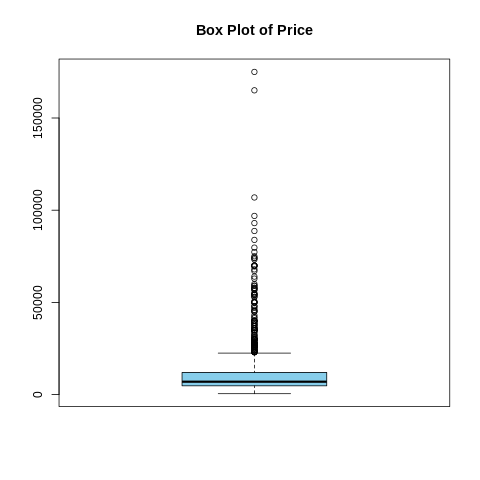

In [17]:
%%R
#Plotting a boxplot
boxplot(data$Price, main = "Box Plot of Price", col = "skyblue")

The diagram above shows the distribution of the Price colums. Outliers are those points displayed outside the box.

The box plot gives a visual representation of both upper bound and lower bound outliers. From the image above we can see that there are no lower bound outliers, just upper bound.

It is important to note that handling outliers depends on our analysis and the dataset.

## QUESTION 2
### a: Select four variables in the dataset and propose an appropriate probability model to quantify uncertainty of each variable.

Here we will be using the following variables
* **Price:** This column contains a continuous distribution that represents the cost for phones and thus we will be using the **Normal Distribution**.
* **Number of sims:** This column contains the count of the number of sims present in each device. For this, the appropriate probability model is the **Poisson distribution**
* **Operating Systems:** This column contains catgorical variables that shows various operating systems of each devices. The appropriate probability model for this distribution is the **Multinomial distribution**
* **Wi-fi:** This column contains categorical variables of two options, yes and no, signifying the presense or absent of wi-fi in a device. For this column, the appropriate probability model is the the **Bernoulli Distribution**





### B: For each model in part(a) estimate the parameters of the model.

- Estimating the parameter in a Normal Distribution: In a normal distribution, the parameters typically refer to the mean (μ) and standard deviation (σ). These parameters define the shape and location of the distribution. Taking the Price colum, here is how we estimate the parameter.


In [ ]:
%%R
Column = data$Price
mean_value = mean(Column) # Calculating the mean
sd_value = sd(Column)  # Calculating the Standard deviation

# Printing the values
cat("Mean:", mean_value, "\n")
cat("Standard Deviation:", sd_value, "\n")


Mean: 11465.83 
Standard Deviation: 13857.5 


- Estimating the parameter in the Poisson distribution. In a Poisson distribution, the parameter is often denoted by the symbol λ (lambda), which represents the average rate of occurrence or the average number of events in a fixed interval of time or space, thus the mean. Here's the estimated Poisson parameter in the Number of sums columns.

In [ ]:
%%R
lambda_estimate = round(mean(data$Number.of.SIMs),2)
cat("Estimated Lambda:", lambda_estimate, "\n")

Estimated Lambda: 1.83 


- Estimating the Parameter in the Multinomial Distribution: In a multinomial distribution, the parameters are probabilities assigned to different outcomes, and they are typically represented by the vector P = (p1,p2,...,pk) where k is the number of posibilities. Here is the estimated parameter in the Operating system columns.


In [ ]:
%%R
# Identifying the Operating system column
X=data$Operating.system

# Getting the count of each OS in the dataset
t=table(X)

# calulating the estimated probability for each So
p=round(t/sum(t),3)

print(p)

X
   Android BlackBerry   Cyanogen        iOS   Sailfish      Tizen    Windows 
     0.956      0.007      0.007      0.013      0.001      0.002      0.014 


- Estimating the parameter in a Bernoulli Distribution. In a Bernoulli distribution, there is a single parameter denoted by p, which represents the probability of success. The probability of failure is = 1 - p. Here is estimated parameter in the Wi-fi column

In [ ]:
%%R
# Identifying the wifi column
Wi_fi = data$Wi.Fi

# Getting the count of successes(yes) and failuers(No)
count = table(Wi_fi)

# Isolating the number of successes
success = count[2]

# Printing out the parameter
p_estimate = success/nrow(data)
print(p_estimate)

      Yes 
0.9941133 


### C: Express the way in which each model can be used for the predictive analytics, then find the prediction for each attribute.

To predict certain probabilities, we can use the Probability Mass Function(PMF) or the Cumulative Distribution Function(CDF). The use of either funtion depends on what predictions we need to make. Here is how we make predictions using each models either of the functions.

* **Normal Distribution:** In R,  we use the 'pnorm' funtion to calculate the CDF of a normal distribution. It is given as pnorm(x, mean, sd) ,
  - where x represents the value for which we want to calculate the probability.
  
  For instance, lets answer a question.
What is the probability that a randomly selected Phone costs less than or equal to 10,000 INR?.

In [ ]:
%%R
# Estimating the parameter
mean_price = mean(data$Price)
sd_price = sd(data$Price)

# Calculate the probability that the cost is less than 10,000 P(X≤10,000)
p_less_than_100 = pnorm(10000, mean = mean_price, sd = sd_price)

# Calculate the probability that the costs more than 10,000 P(X>10,000)
p_more_than_100 = 1 - p_less_than_100

# Display Results
cat("Probability that Price <= 10,000:", p_less_than_100, "\n")
cat("Probability that Price > 10,000:", p_more_than_100, "\n")


Probability that Price <= 10,000: 0.457879 
Probability that Price > 10,000: 0.542121 


##### Interpretation
This suggests that there is a 45.79% chance that a randomly selected phone price will be less than or equal to 10,000 rupees, and a 54.21% chance that the prices will likely be greater than 10,000 rupees.

* **Poisson Distribution:** In R, the PMF for Poisson Distribution is given as
'dpois(x, lambda)',
  - where x represents the number of events or occurrences we are interested in,
  - lambda is the average rate of occurrence.\
  
  For instance, let's answer a question\
What is the probability of a phone having 2 SIMs, i.e P(X=2)?


In [ ]:
%%R
# Estimating parameter
lambda = mean(data$Number.of.SIMs)

# The probability of having exactly 2 SIMs P(X=2)
p_of_2_sims = dpois(2, lambda = lambda)

cat("The probability of a phone having exactly 2 SIMs is:", p_of_2_sims, "\n")

The probability of a phone having exactly 2 SIMs is: 0.2686958 


##### Interpretation:
This suggest that there is a 26% likelihood of randomly picking a phone with two sims

* **Multinomial Distribution**: In R, we use the 'dmultinom' function to calculate the PMF of a multinomial distribution. It is denoted as
dmultinom(x,n,p)
  - Where x = the observed counts for each category,
  -       n = the total number of trials,
  - p = Probabilities for each category

  For instance, let's answer a question \
  What is the probability of getting 3 Andriod, 2 blackbery, 2 Cyanogen, 1 ios and 1 windows?

In [ ]:
%%R
# Identifying the Operating system column
X=data$Operating.system

# Estimating the parameter
T=table(X)
p=T/nrow(data) # the probability of each category

# The total number of trials
n=9

# The counts of each category we are observing
x=c(3, 2, 2, 1, 0, 0, 1)

# Calculate the multinomial PMF
p_result = dmultinom(x,n,p)

p_result

[1] 6.77028e-09


* **Bernoulli distribution**: In R, we use the 'dbinom' function to calculate the PMF for a Bernoulli distribution. It is denoted as dbinom(j,1,p)
  - where; j is the possible outcome
  - p is the probability of getting one

  For instance, what is the probability of getting a phone with a wifi? P(X=1)

In [ ]:
%%R
# Identifying the wifi column
Wi_fi = data$Wi.Fi
j= 1

# Estimating the parameter
count = table(Wi_fi) # Getting the count of successes(yes) and failuers(No)
success = count[2] # Isolating the number of successes
p = success/nrow(data) # the probability of success

# The PMF for getting 1 (success)
pmf_success = dbinom(1, size = 1, prob = p)
print(pmf_success)

[1] 0.9941133


##### Interpretation
There's a 99% chance of picking a phone with a wi_fi.


## Question 3
### A: Consider two categorical variables of the dataset, develop a binary decision making strategy to check whether two variables are independent at the significant level alpha=0.01.

For this test we will consider the Wifi and Bluetooth column, and we will test to see their dependence/independence from each other.

**Step 1:** State the hypothesis\
H0: Wifi is independent of Bluetooth \
H1: Wifi is dependent of Bluetooth

**Step 2:** Find the statistic and critical values


In [ ]:
%%R
# Specifying X1 and X2
X1 = data$Wi.Fi
X2 = data$Bluetooth

# setting alpha
alpha = 0.01

# Creating the contingenct table
O = table(X1,X2)
O

     X2
X1      No  Yes
  No     3    5
  Yes   12 1339


In [ ]:
%%R
n = nrow(data) # Identifying the number of row

# Defining the matrix
E= matrix(NA,2,2)

for (i in 1:2){
    for(j in 1:2){
        Ci = sum(O[i,]);
        Cj = sum(O[,j])
        E[i,j]=(Ci*Cj)/n
    }
}

* Find the Chi-Square test statistic(test value) and the critical value(c.value)

In [ ]:
%%R
# Computing the test statistic(test value)
test.value = sum((O-E)^2/E)

# Computing the c.value
c.value = qchisq(1-alpha,4)


cat("The test value is :",test.value,'\n')
cat("The critcal value is : ", c.value)

The test value is : 97.65977 
The critcal value is :  13.2767

* **Step 3:** Decision rule \
If the test value is greater than the c value reject H0, if the reverse is the case, accept HO.

In [ ]:
%%R
# Decision Making
if (test.value > c.value){cat("Reject HO. Wifi is dependent on Bluetooth")
}else{
    cat("Accept HO. Wifi is independent of Bluetooth")
}

Reject HO. Wifi is dependent on Bluetooth

* **Step 3:** Explain your decision and Interpret results.\
For this analysis, since the test.value is greater than c.value then we accept H0. This implies that on a siginificance level of 0.01, the two categorical variable Bluetooth and Wifi are dependent on each other.


In [31]:
%%R
unique(data$Operating.system)

[1] "Android"    "iOS"        "Cyanogen"   "BlackBerry" "Windows"   
[6] "Tizen"      "Sailfish"  


### B. Consider one categorical variable, apply goodness of fit test to evaluate whether a candidate set of probabilities can be appropriate to quantify the uncertainty of class frequency at the significant level alpha=0.05.

In this hypothesis test, we are conducting a goodness-of-fit test for categorical data. We'll use the operating systems column as an example.

For easy interpretation, we will represent our hypothesis as the following:
* OS1: Andriod
* OS2: iOS
* OS3: Cyanogen
* OS4: BlackBerry
* OS5: Windows
* OS6: Tizen
* OS7: Sailfish

** Stating the hypothesis** \

H0: OS1=OS2=OS3=OS4=OS5=OS6=OS7
H1: NOT HO

side-note:*The null hypothesis (H0) states that the proportions of the different categories in the operating systems column are equal. In other words, the distribution of operating systems across all categories (OS1, OS2, OS3, OS4, OS5, OS6, and OS7) is the same. The Null Hypothesis(H1) states the opposite*


In [ ]:
%%R
# Specifying the data
X = data$Operating.system

# Specifying alpha
alpha = 0.05

# Frequency of each category
o = table(X)

# Expected probability for each category
N = length(unique(X))
p = rep(1/N,N)

n = length(X)
# Expected frequency for each category
E = n*p

# computing the test value
test.value = sum((o - E)^2 / E)

# Degrees of freedom
df = n - 1

# Computing c.value
c.value = qchisq(1 - alpha, df)

cat("The test value is :",test.value,'\n')
cat("The critcal value is : ", c.value)



The test value is : 7336.973 
The critcal value is :  1444.844

- Decision rule:\
If test.value is > c.value, therefore we reject HO

In [ ]:
%%R
# Compare the test statistic with critical value or use p-value for hypothesis testing
if (test.value > c.value) {
  cat("Reject H0")
} else {
  cat("Accept H0")
}

Reject H0

#### Interpretation:
We reject H0, thus The proportions of operating systems are not all equal (i.e., at least one proportion is different).


### C. Consider one continuous variable in the dataset, and apply test of mean for a proposed candidate of μ at the significant level alpha=0.05

Here, using the price columns, we want to test whether or not the average price in the dataset is 10,000 INR.

Thus, MuO = 10,000.\
**Step one** State the Hypothesis \

H0: The average price in the dataset is 10,000, i.e \
mu == 10,000 \
H1: The average price in the dataset is not 10,000, i.e \
mu =/=10,000 \

**Step 2** Find the test and critical value

In [ ]:
%%R

X = data$Price

# Defining Mu
muO= 10000

# Defining alpha
alpha = 0.05

# Defining the mean
Xbar = mean(X)

# Defining the Sigma(standard deviation)
sigma = sd(X)

# Defining the length of rows
n = length(X)

# Calculating the test value
test.value = (Xbar-muO)/(sigma/sqrt(n))

# Calculating the critical value
c.value = qnorm(alpha/2)

cat("The test value is :",test.value,'\n')
cat("The critcal value is : ", c.value)



The test value is : 3.899485 
The critcal value is :  -1.959964

* Decision:\
If test.value is > c.value, therefore we reject HO

In [ ]:
%%R
# Compare the test statistic with critical value or use p-value for hypothesis testing
if (test.value > c.value) {
  cat("Reject H0")
} else {
  cat("Accept H0")
}

Reject H0

The test value is in the rejection region (beyond the critical value), thus reject the null hypothesis and conclude that there is evidence that the average price of phones is different from 10,000 INR